# Contestants EDA

The purpose of this notebook is to examine the makeup of Jeopardy Contestants and their winnings. We begin by filtering for only non-tournament games, since tournaments and themed weeks do not follow the same conventions as regular season games. For example, in the regular season the third contestant is always the last episode's winner, which is not the case for tournaments and themed weeks. 

We begin by extracting data from the games.csv and converting it to a dataframe of just contestants and their winnings. Since all contestant data is stored in a column describing what number contestant they are, we create three dataframe for contestant_1, contestant_2 and returning_champion and then concatenate them together. One minor flaw in this process is that the winnings for 2nd place (2,000) and 3rd place (1,000) are not included. This means our analysis for winnings is applied only to the winnings of returning champions, and not the contestant population at large. 

### Data Preparation

In [14]:
#Import packages and read in the data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 50
pd.options.display.max_rows = 25
os.chdir('C:\\Users\\mhous\\scrap\\JeopardyProject')
df = pd.read_csv('games_clean.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   show_number                  4282 non-null   int64  
 1   game_id                      4282 non-null   object 
 2   game_comments                2176 non-null   object 
 3   contestant_1                 4282 non-null   object 
 4   contestant_1_job             4266 non-null   object 
 5   contestant_1_city            4243 non-null   object 
 6   contestant_1_state           4176 non-null   object 
 7   contestant_2                 4282 non-null   object 
 8   contestant_2_job             4282 non-null   object 
 9   contestant_2_city            4282 non-null   object 
 10  contestant_2_state           4175 non-null   object 
 11  returning_champion           4282 non-null   object 
 12  returning_champion_job       4282 non-null   object 
 13  returning_champion

In [16]:
df.head()

,show_number,game_id,game_comments,contestant_1,contestant_1_job,contestant_1_city,contestant_1_state,contestant_2,contestant_2_job,contestant_2_city,...,c_2_score_DJ,rc_score_DJ,c_1_score_F,c_2_score_F,rc_score_F,c_1_wager,c_2_wager,rc_wager,winning_score,winning_contestant
0,3966,"Show #3966 - Monday, November 26, 2001",Clue dollar values are doubled.,Harold Skinner,a teacher and playwright,Columbia,South Carolina,Geoffrey Zimmerman,a lawyer,Toronto,...,3800.0,3400.0,7700.0,7600.0,0.0,2300.0,3800.0,3400.0,7700.0,Harold Skinner
1,3967,"Show #3967 - Tuesday, November 27, 2001",NaN,Kris MacCubbin,a director of communication,Kensington,Maryland,Rebekah Lacey,an environmental scientist,Boston,...,15800.0,13400.0,12200.0,20800.0,0.0,4400.0,5000.0,13400.0,20800.0,Rebekah Lacey
2,3968,"Show #3968 - Wednesday, November 28, 2001",(Cheryl: This is Cheryl from the Jeopardy! Clu...,Trish Miller,an administrative assistant,Boston,Massachusetts,Susan Rathke,a residential caregiver,Madison,...,15400.0,11200.0,15000.0,23400.0,6200.0,7000.0,8000.0,5000.0,23400.0,Susan Rathke
3,3969,"Show #3969 - Thursday, November 29, 2001",(Sarah: I'm Sarah of the Clue Crew. Today on ...,Adam Lipsius,a video professor and filmmaker,New York,New York,Frank Stasio,a data analyst,New York,...,15000.0,17000.0,2300.0,30000.0,13000.0,900.0,15000.0,4000.0,30000.0,Frank Stasio
4,3970,"Show #3970 - Friday, November 30, 2001","(Sofia: Hi, this is Sofia of the Clue Crew. T...",Charan Brahma,an attorney,Los Angeles,California,Lara Kierlin,a pre-med student,Hermosa Beach,...,7600.0,12000.0,500.0,3199.0,12000.0,11500.0,4401.0,0.0,12000.0,Frank Stasio


Some of the tournaments are not described as tournaments in the game comments, such as The Battle of the Decades and the College Championship. I also choose to remove non-tournament games that feature children (Back to School week, A Kids Week) since they are special events and the champions cannot continue playing indefinitely 


In [17]:
#Count the number of torunament and non-tournament games
df['game_comments'].str.contains(r'^((?![Tt]ournament |Battle | [Cc]hampionship |Back |Kids |Million ).)*$').fillna(True).value_counts()

C:\Users\mhous\Anaconda3\envs\scrapy\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


True     3525
False     757
Name: game_comments, dtype: int64

In [18]:
#Filter regular season games into reg_season
reg_season = df[df['game_comments'].str.contains(r'^((?![Tt]ournament |Battle |[Cc]hampionship |Back |Kids |Million).)*$').fillna(True)]
#tournaments = df[df['game_comments'].str.contains(r'([Tt]ournament |Battle |[Cc]hampionship |Back |Kids |Million)').fillna(False)]

Now that we have all the regular season games in one dataframe, let's gather together all the data on the contestants. Since each contestant is designated as contestant_1, contestant_2, or returning champion, we make three dataframes for each one, relabel the columns, drop duplicates in for returning champions and keep the last entry, then concatenate them together. We then drop duplicates again, since every returning champion was once either contestant_1 or contestant_2

In [19]:
c1_df = reg_season[['contestant_1', 'contestant_1_job', 'contestant_1_city', 'contestant_1_state']]
c1_df.columns = ['contestant', 'job', 'city', 'state']

In [20]:
c1_df.head()

,contestant,job,city,state
0,Harold Skinner,a teacher and playwright,Columbia,South Carolina
1,Kris MacCubbin,a director of communication,Kensington,Maryland
2,Trish Miller,an administrative assistant,Boston,Massachusetts
3,Adam Lipsius,a video professor and filmmaker,New York,New York
4,Charan Brahma,an attorney,Los Angeles,California


In [21]:
c2_df = reg_season[['contestant_2', 'contestant_2_job', 'contestant_2_city', 'contestant_2_state']]
c2_df.columns = ['contestant', 'job', 'city', 'state']

In [22]:
rc_df = reg_season[['returning_champion', 'returning_champion_job', 'returning_champion_city', 'returning_champion_state', 'returning_champion_streak', 'returning_champion_winnings']]
rc_df.columns = ['contestant', 'job', 'city', 'state', 'streak', 'winnings']
rc_df.head()

,contestant,job,city,state,streak,winnings
0,Kristin Lawhead,a multimedia artist,New Orleans,Louisiana,NaN,NaN
1,Harold Skinner,a teacher and playwright,Columbia,South Carolina,1,7700.0
2,Rebekah Lacey,an environmental scientist,Boston,Massachusetts,1,20800.0
3,Susan Rathke,a residential caregiver,Madison,Wisconsin,1,23400.0
4,Frank Stasio,a data analyst,New York,New York,1,30000.0


In [23]:
c1_df = c1_df.drop_duplicates(['contestant'], keep='last')
c2_df = c2_df.drop_duplicates(['contestant'], keep='last')
rc_df = rc_df.drop_duplicates(['contestant'], keep='last')
rc_df.head()

,contestant,job,city,state,streak,winnings
0,Kristin Lawhead,a multimedia artist,New Orleans,Louisiana,NaN,NaN
1,Harold Skinner,a teacher and playwright,Columbia,South Carolina,1,7700.0
2,Rebekah Lacey,an environmental scientist,Boston,Massachusetts,1,20800.0
3,Susan Rathke,a residential caregiver,Madison,Wisconsin,1,23400.0
5,Frank Stasio,a data analyst,New York,New York,2,42000.0


In [50]:
contestants = pd.concat([rc_df, c1_df, c2_df], axis=0)
contestants = contestants.drop_duplicates(['contestant'], keep='first')
contestants['streak'] = contestants['streak'].fillna(0).astype(int)
contestants['mean_winnings'] = contestants['winnings']/contestants['streak']
contestants['mean_winnings'] = contestants['mean_winnings'].round()
contestants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7025 entries, 0 to 4281
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   contestant     7025 non-null   object 
 1   job            7024 non-null   object 
 2   city           7004 non-null   object 
 3   state          6924 non-null   object 
 4   streak         7025 non-null   int32  
 5   winnings       1823 non-null   float64
 6   mean_winnings  1823 non-null   float64
dtypes: float64(2), int32(1), object(4)
memory usage: 411.6+ KB


In [51]:
contestants.head()

,contestant,job,city,state,streak,winnings,mean_winnings
0,Kristin Lawhead,a multimedia artist,New Orleans,Louisiana,0,NaN,NaN
1,Harold Skinner,a teacher and playwright,Columbia,South Carolina,1,7700.0,7700.0
2,Rebekah Lacey,an environmental scientist,Boston,Massachusetts,1,20800.0,20800.0
3,Susan Rathke,a residential caregiver,Madison,Wisconsin,1,23400.0,23400.0
5,Frank Stasio,a data analyst,New York,New York,2,42000.0,21000.0


One minor detail is that the beginning of the dataset has games in which the returning champion could only play in 5 games, so some 'returning champions' like Kristin Lawhead was actually just a new contestant in the returning champion's normal podium.

### Contestant Analysis

We now have a dataset of all contestants on regular season jeopardy from when point values being doubled in 2001 to 2020. One flaw in this data is that we have not added the losing contestant's winnings, so the analysis of winnings only applies to returning champions. Another difficulty in addressing this problem is that Jeopardy used to give vacations as rewards for 2nd and 3rd place contestants, so even if we did impute 2,000 or 1,000 it still technically isn't correct.

Let's first take a look at the type of jobs Jeopardy Contestants have:

In [52]:
contestants['job'].str.strip(' ').value_counts().head(20)

an attorney                      247
a graduate student               108
a writer                          94
a stay-at-home mom                73
a teacher                         72
a librarian                       65
a student                         57
a law student                     54
a lawyer                          52
a homemaker                       47
an administrative assistant       43
a journalist                      42
a software engineer               42
a project manager                 35
an actor                          32
a medical student                 30
a high school teacher             28
a graduate student originally     28
an editor                         28
a bartender                       26
Name: job, dtype: int64

Most of these are unsurprising results. Since education is likely highly correlated with trivia knowledge, it makes sense that people who are pursuing or hold an advanced degree could qualify for Jeopardy. Other professions like teachers, librarians, journalists, and software engineers also tend to require a bachelors degree. There's also some job descriptions that are practically identical, like 'a teacher' and 'a high school teacher', and 'a graduate student' and 'a graduate student originally'.

Let's look at where the contestants tend to live

In [53]:
contestants['state'].str.strip(' ').value_counts().head(10)

California       1019
New York          677
Massachusetts     343
Illinois          339
Virginia          315
Pennsylvania      309
Texas             276
Maryland          243
Florida           232
New Jersey        216
Name: state, dtype: int64

Again unsuprising, since these states have a large urban populations of highly educated professionals. California is also where the show is taped, so there might be some slight bias there in contestants being able to attend. 

In [54]:
contestants['city'].str.strip(' ').value_counts().head(10)

New York        221
Los Angeles     213
Washington      199
Chicago         157
Brooklyn        125
Seattle          88
Arlington        81
San Diego        76
Atlanta          69
Philadelphia     66
Name: city, dtype: int64

Similar results as the contestant's state, since cities attract highly educated people.

In [55]:
contestants['streak'].describe(percentiles = [.25, .5, .75, .9, .95, .99])

count    7025.000000
mean        0.495231
std         1.474541
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
90%         2.000000
95%         3.000000
99%         5.000000
max        74.000000
Name: streak, dtype: float64

What's surprising about the summary statistics of winning streak is how relatively few games the higher percentiles are. Winning 2 games in a row puts you in the top 10% of Jeopardy contestants, and winning 5 puts in in the top 1%. This also shows how impressive Ken Jennings' run of 74 games is. 

In [56]:
contestants['streak'].value_counts().sort_index()

0     5202
1     1051
2      405
3      191
4       77
5       48
6       22
7       10
8        7
9        3
11       1
12       2
13       1
19       2
20       1
32       1
74       1
Name: streak, dtype: int64

Unsurprising that the winning streak is monotonically decreasing for streaks less than 10. The following histogram plots this data.

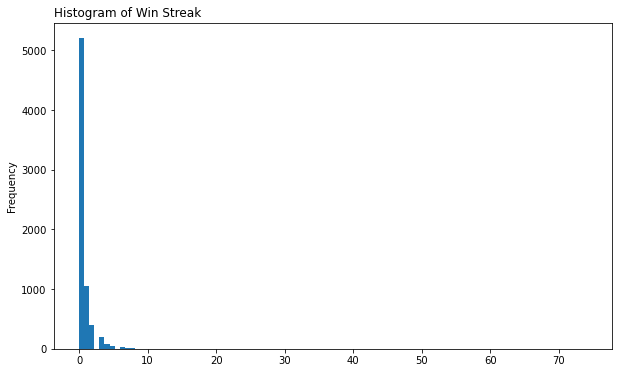

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
contestants['streak'].plot.hist(bins=100)
plt.title('Histogram of Win Streak', loc = 'left')
plt.show()

In [58]:
contestants.sort_values('winnings', ascending=False).head(10)

,contestant,job,city,state,streak,winnings,mean_winnings
688,Ken Jennings,a software engineer,Salt Lake City,Utah,74,2520700.0,34064.0
4024,James Holzhauer,a professional sports gambler,Las Vegas,Nevada,32,2462216.0,76944.0
4077,Jason Zuffranieri,a math teacher,Albuquerque,New Mexico,19,532496.0,28026.0
862,David Madden,a student originally,Ridgewood,New Jersey,19,430400.0,22653.0
2879,Julia Collins,a supply chain professional,Kenilworth,Illinois,20,428100.0,21405.0
3176,Matt Jackson,a paralegal,Washington,D.C.,13,411612.0,31662.0
3637,Austin Rogers,a bartender,New York,New York,12,411000.0,34250.0
2821,Arthur Chu,a compliance analyst and voiceover artist,Broadview Heights,Ohio,11,297200.0,27018.0
3401,Seth Wilson,a Ph.D. candidate,Chicago,Illinois,12,265002.0,22084.0
2081,Tom Nissley,an online books editor,Seattle,Washington,8,235405.0,29426.0


In [59]:
contestants['winnings'].describe(percentiles = [.1, .25, .5, .75, .9])

count    1.823000e+03
mean     3.961349e+04
std      8.991427e+04
min      0.000000e+00
10%      1.030460e+04
25%      1.665050e+04
50%      2.579900e+04
75%      4.419950e+04
90%      7.268100e+04
max      2.520700e+06
Name: winnings, dtype: float64

The mean is way higher than I would've guessed, but it makes sense given the extreme outliers of Ken Jennings and James Holzhauer. The median is a much more reasonable \$25,800. 

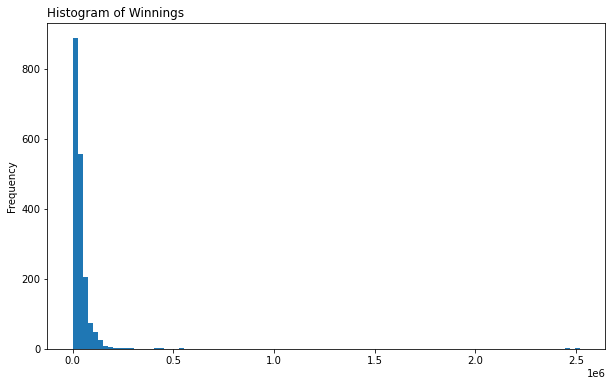

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
contestants['winnings'].plot.hist(bins = 100)
plt.title('Histogram of Winnings', loc = 'left')
plt.show()

This histogram is borderline unusable because of the Ken and James. Let's make a copy of the dataframe without those contestants and see how things differ.

In [61]:
contestants_no_KJ_no_JH = contestants[(contestants['contestant'] != "Ken Jennings") & (contestants['contestant'] != "James Holzhauer")]
contestants_no_KJ_no_JH['winnings'].describe()

count      1821.000000
mean      36920.633718
std       38460.050709
min           0.000000
25%       16601.000000
50%       25706.000000
75%       44100.000000
max      532496.000000
Name: winnings, dtype: float64

We find that Jennings and Holzhauer bump the mean earnings of returning champions by about 2,700, from 36,920 to 39,610. Most shocking is the standard deviation without these contestants also drops from 89,900 to 38,460.  

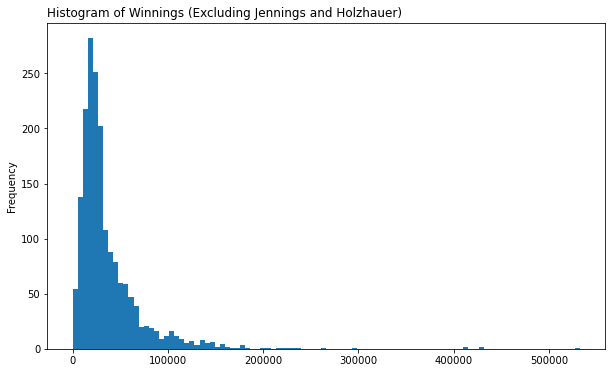

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
contestants_no_KJ_no_JH['winnings'].plot.hist(bins=100)
plt.title('Histogram of Winnings (Excluding Jennings and Holzhauer)', loc = 'left')
plt.show()

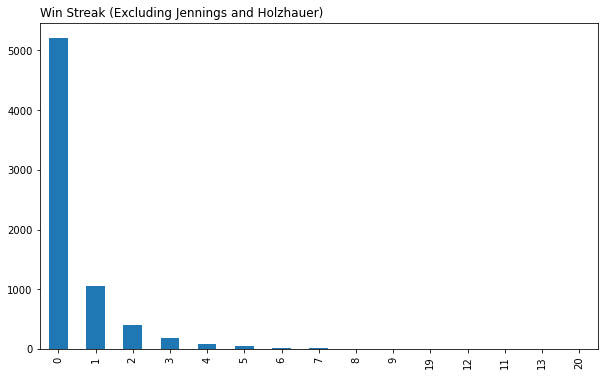

In [74]:
fig, ax = plt.subplots(figsize=(10,6))
contestants_no_KJ_no_JH['streak'].value_counts().plot.bar()
plt.title('Win Streak (Excluding Jennings and Holzhauer)', loc = 'left')
plt.show()

In [75]:
contestants['mean_winnings'].describe()

count     1823.000000
mean     19181.560614
std       7441.567835
min          0.000000
25%      14100.000000
50%      19200.000000
75%      24001.000000
max      76944.000000
Name: mean_winnings, dtype: float64

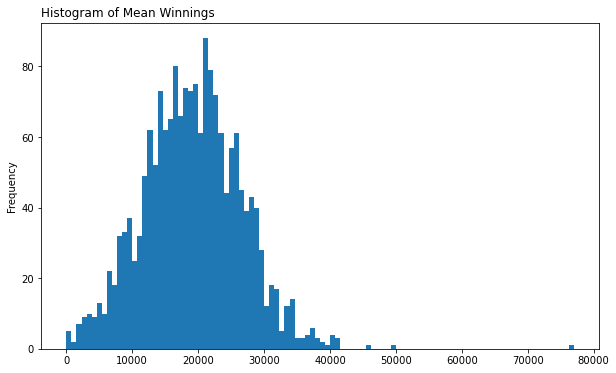

In [76]:
fig, ax = plt.subplots(figsize=(10,6))
contestants['mean_winnings'].plot.hist(bins=100)
plt.title('Histogram of Mean Winnings', loc = 'left')
plt.show()

This histogram also puts into perspective how impressive Holzhauer's run on Jeopardy was, since his mean winnings per game is way past all other returning champions

Let's use the Gini Coefficient to analyze the winnings inequality among returning champions. 

In [27]:
def gini(x):
    n = len(x)
    i = np.arange(1, 1+n)
    numerator = np.sum((2*i - n-1) * x)
    denominator = np.sum(x * n)
    return round(100*numerator/denominator, 1)

In [28]:
ordered_winnings = np.array(contestants['winnings'].dropna().sort_values())
gini(ordered_winnings)

46.9

In [29]:
ordered_winnings_no_KJ_no_JH = np.array(contestants_no_KJ_no_JH['winnings'].dropna().sort_values())
gini(ordered_winnings_no_KJ_no_JH)

43.1